### Please note: this assignment 3 to detect cancer from images was built using google Colab - Using an A100 GPU (40 GB) and 84 GB RAM.

## Brief Description of the Problem and Data
The below is from a Kaggle competition. Here is the Kaggle link for reference. (https://www.kaggle.com/c/histopathologic-cancer-detection/overview)
The Kaggle competition focuses on using deep learning techniques to detect cancer from histopathologic scan images. The dataset comprises over 200,000 .tif image files, with the problem framed as a binary classification task (cancerous vs. non-cancerous). Each image is labeled 1 for cancerous and 0 for non-cancerous. To manage the dataset size and facilitate processing on Google Colab, the images were consolidated into a single .pickle file. The original data includes a split of 130,908 non-cancerous and 89,117 cancerous samples, totaling 220,025 images.

## Exploratory Data Analysis (EDA)
EDA involved loading and visualizing images from the .pickle file, examining the distribution of labels, and preparing a balanced subset of the data for training. Visualizations like histograms of label distributions were created to understand the data better. Due to memory limitations and image size I had to limit the analysis to 15,0000 images with cancer and 15,000 images without cancer. Google Colab with 84 GB of RAM and a A100 GPU of 40 GB could only handle this number of images at one time. For the future to improve the process there may be ways to feed in the images by doing multiple iterations of the training. I decided to do one training run due to my budget within Google Colab. Also the balanced dataset of 30,000 images (15,000 cancerous and 15,000 non-cancerous) was prepared to avoid bias towards the more prevalent class. Data cleaning involved selecting a balanced subset and normalizing image pixel values to the range [0, 1].

## Final Model Architecture
The model architecture chosen was a Convolutional Neural Network (CNN) with the following layers:

Four convolutional layers with increasing filter sizes (32, 64, 128, 128) and ReLU activation, each followed by max-pooling layers to reduce dimensionality.
A flattening layer to convert 3D feature maps to 1D feature vectors.
A dense layer with 512 units and ReLU activation for high-level reasoning.
A dropout layer with a rate of 0.1 to reduce overfitting.
An output dense layer with a sigmoid activation function for binary classification.
The CNN was compiled with the Adam optimizer and binary cross-entropy loss function, including accuracy, precision, and recall metrics for evaluation. This architecture was chosen for its capacity to learn hierarchical feature representations from the image data, which is crucial for distinguishing between cancerous and non-cancerous tissue patterns.

Numerous other CNN models were evaluated. I tried 30 epochs which clearly showed signs of overfitting the data as the training accuracy went to 100% but the validation accuracy bounced around at 80% with no improvements. I found the best model with the CNN layers above only needed 5 epochs. Also I experimented with dropout rates of .9, .5 and .1. The drop out rate of .9 is too much and underfits the data and performs the same as a coin flit of 50% accuracy score. The drop out rate of .5 is good but I found a drop out rate of .1 is the best due to the model overfitting.

## Results and Analysis
The model was trained on the balanced dataset with a training-validation split. Training was conducted over 5 epochs, with improvements observed in accuracy, precision, and recall on both training and validation sets. The final model achieved a training accuracy of 85.17%, with validation accuracy slightly lower, indicating good generalization. Again, various dropout rates were experimented with, and a rate of 0.1 was found optimal in this context.

## Conclusion
The CNN model demonstrated effective learning from histopathologic scan images, achieving a balance between accuracy, precision, and recall. The use of a balanced dataset and appropriate data normalization techniques were critical in achieving these results. Future improvements could explore more complex architectures, advanced data augmentation techniques, and further hyperparameter tuning to enhance model performance.

In [1]:
import socket

def check_host(hostname, port=80):
    try:
        socket.create_connection((hostname, port), timeout=10)
        print(f"{hostname} is reachable on port {port}.")
    except socket.error as err:
        print(f"{hostname} is not reachable on port {port}. Error: {err}")

check_host('www.google.com')



www.google.com is reachable on port 80.


In [2]:
import requests

def check_website(url):
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            print(f"{url} is reachable.")
        else:
            print(f"{url} returned status code {response.status_code}.")
    except requests.RequestException as e:
        print(f"Failed to reach {url}. Error: {e}")

check_website('http://www.google.com')


http://www.google.com is reachable.


In [3]:
#!google-drive-ocamlfuse -wipe

In [4]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')


#drive.mount('/content/drive')



!free -h


Mounted at /content/drive
               total        used        free      shared  buff/cache   available
Mem:            83Gi       1.0Gi        79Gi       1.0Mi       2.7Gi        81Gi
Swap:             0B          0B          0B


In [5]:
import gc


In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

!nvidia-smi


Tue Feb 27 22:54:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [7]:
import os

current_working_directory = os.getcwd()
print("Current Working Directory:", current_working_directory)

Current Working Directory: /content


In [8]:
import pandas as pd

labels_path = '/content/drive/My Drive/DeepLearning/train_labels.csv'
print(labels_path)

labels_df = pd.read_csv(labels_path)


print(labels_df.head())


/content/drive/My Drive/DeepLearning/train_labels.csv
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0


# **Please note the below pickle file for training was built using the original training folder containing over 200,000 .tif image files. The pickle is one file which contains all of those images - this update was to allow for Google Colab to work correctly. - I found that Google Colab has issues with thousands of files.**


# Label	Count
# 0	0	130908
# 1	1	89117
# 2	Total	220025

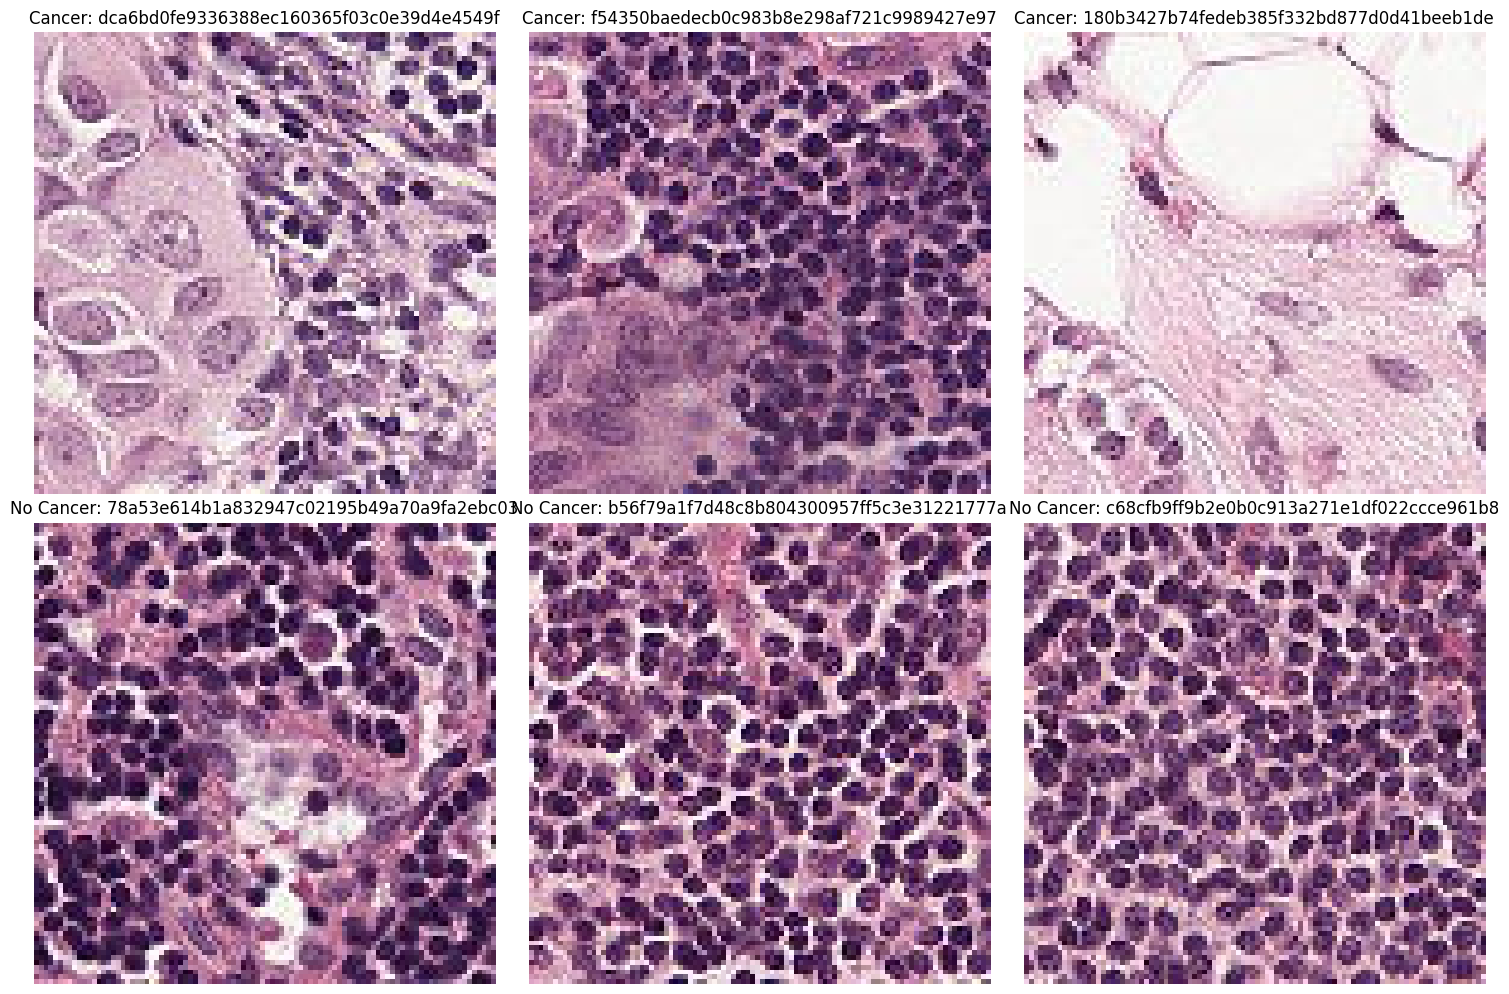

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import pickle
import io

# Load the pickle file
pickle_file_path = '/content/drive/My Drive/DeepLearning/train_images.pickle'
with open(pickle_file_path, 'rb') as f:
    images_with_names = pickle.load(f)

# Convert list of tuples into a dictionary for easier access
images_dict = {name: img_bytes for name, img_bytes in images_with_names}

# Assuming `labels_df` is already defined and contains the 'id' and 'label' columns
sample_ids_with_cancer = labels_df[labels_df['label'] == 1].sample(3)['id'].values
sample_ids_without_cancer = labels_df[labels_df['label'] == 0].sample(3)['id'].values

# Load and display images
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, img_id in enumerate(sample_ids_with_cancer):
    img_bytes = images_dict[f"{img_id}.tif"]
    img = Image.open(io.BytesIO(img_bytes))
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Cancer: {img_id}")
    axs[0, i].axis('off')

for i, img_id in enumerate(sample_ids_without_cancer):
    img_bytes = images_dict[f"{img_id}.tif"]
    img = Image.open(io.BytesIO(img_bytes))
    axs[1, i].imshow(img)
    axs[1, i].set_title(f"No Cancer: {img_id}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()



In [10]:
print(labels_df.count())

print(labels_df.shape)

id       220025
label    220025
dtype: int64
(220025, 2)


In [11]:
import pandas as pd


label_counts = labels_df['label'].value_counts()

# Calculate the total count
total_count = labels_df['label'].count()

# Manually construct the summary DataFrame including the total count
summary_df = pd.DataFrame({
    'Label': ['0', '1', 'Total'],
    'Count': [label_counts.get(0, 0), label_counts.get(1, 0), total_count]
})

display(summary_df)



,Label,Count
0,0,130908
1,1,89117
2,Total,220025


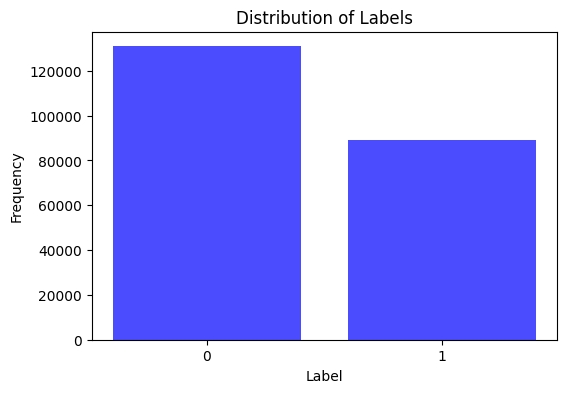

In [12]:
plt.figure(figsize=(6, 4))
plt.hist(labels_df['label'], bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='blue', alpha=0.7)
plt.xticks([0, 1])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()


## modify labels df here...

In [13]:

labels_df['filename'] = labels_df['id'].apply(lambda x: f"{x}.tif")



labels_df['label'] = labels_df['label'].astype(str)



In [14]:
display(labels_df)

,id,label,filename
0,f38a6374c348f90b587e046aac6079959adf3835,0,f38a6374c348f90b587e046aac6079959adf3835.tif
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1,c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif
2,755db6279dae599ebb4d39a9123cce439965282d,0,755db6279dae599ebb4d39a9123cce439965282d.tif
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif
4,068aba587a4950175d04c680d38943fd488d6a9d,0,068aba587a4950175d04c680d38943fd488d6a9d.tif
...,...,...,...
220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6.tif
220021,d4b854fe38b07fe2831ad73892b3cec877689576,1,d4b854fe38b07fe2831ad73892b3cec877689576.tif
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75.tif
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0,f129691c13433f66e1e0671ff1fe80944816f5a2.tif


In [15]:



df_0 = labels_df[labels_df['label'] == '0'].sample(n=15000, random_state=42)


df_1 = labels_df[labels_df['label'] == '1'].sample(n=15000, random_state=42)

# Concatenate the two DataFrames to get a balanced subset here...
balanced_df = pd.concat([df_0, df_1])


In [16]:

balanced_df


,id,label,filename
121450,941ffe73059292e0effd4e81ca9363c117afc2f4,0,941ffe73059292e0effd4e81ca9363c117afc2f4.tif
38268,43b6acadb31161c9281460efa3fad0b992a92837,0,43b6acadb31161c9281460efa3fad0b992a92837.tif
158080,64cfb56ddf41e2a871ac5164d61e50b238b9ed1b,0,64cfb56ddf41e2a871ac5164d61e50b238b9ed1b.tif
154803,9464cf403653088420cdb78acacd8cf7fa2255e4,0,9464cf403653088420cdb78acacd8cf7fa2255e4.tif
93791,346bc5b2d383d70dfccb8fe9102c7f55687f5f52,0,346bc5b2d383d70dfccb8fe9102c7f55687f5f52.tif
...,...,...,...
90148,74755fb29a467ac7cd4776b388be97d86e3b6886,1,74755fb29a467ac7cd4776b388be97d86e3b6886.tif
26006,545f25eb2456f333bb46bdafea399afa38c61f44,1,545f25eb2456f333bb46bdafea399afa38c61f44.tif
53420,e80e9b500ec79e9d779836dfdd47df5417e20bb5,1,e80e9b500ec79e9d779836dfdd47df5417e20bb5.tif
18336,973306145c25f2662f8cbf2c8c24658a1fc92679,1,973306145c25f2662f8cbf2c8c24658a1fc92679.tif


In [17]:


# Extract filenames from the balanced_df
filenames = set(balanced_df['filename'])

# Filter the images_dict to only include keys which are in the balanced data frame
filtered_images_dict = {filename: img_bytes for filename, img_bytes in images_dict.items() if filename in filenames}

# does this free up memory?  not sure
images_dict = None


!free -h


               total        used        free      shared  buff/cache   available
Mem:            83Gi       7.3Gi        56Gi       1.0Mi        19Gi        75Gi
Swap:             0B          0B          0B


In [18]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            83Gi       7.3Gi        56Gi       1.0Mi        19Gi        75Gi
Swap:             0B          0B          0B


In [19]:
gc.collect()

2805

In [20]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            83Gi       7.3Gi        56Gi       1.0Mi        19Gi        75Gi
Swap:             0B          0B          0B


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.optimizers import Adam


import tensorflow as tf

model = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Convolutional layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Convolutional layer 4
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flattening the 3D output to 1D
    Flatten(),

    # Fully connected layer
    Dense(512, activation='relu'),

    # Dropout for regularization
    #Dropout(0.5),
    #Dropout(0.9), too much drop out
    #Dropout(0.4),
    Dropout(0.1),

    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# Model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0


## load the data here..

In [22]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

def load_images_and_labels_from_pickle(df, filtered_images_dict, target_size=(224, 224)):
    images = []
    labels = []
    for _, row in df.iterrows():
        image_bytes = filtered_images_dict[row['filename']]
        image = Image.open(io.BytesIO(image_bytes))
        image = image.resize(target_size)
        image = img_to_array(image)
        image /= 255.0  # Normalize to [0, 1]

        images.append(image)
        labels.append(int(row['label']))

    return np.array(images), np.array(labels)



In [23]:


X, y = load_images_and_labels_from_pickle(balanced_df, filtered_images_dict)

filtered_images_dict = None

gc.collect()


!free -h

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


               total        used        free      shared  buff/cache   available
Mem:            83Gi        41Gi        21Gi        11Mi        20Gi        41Gi
Swap:             0B          0B          0B


In [24]:
# Fit the model without data augmentation
#history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)

!free -h

#history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32)
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32)



               total        used        free      shared  buff/cache   available
Mem:            83Gi        41Gi        21Gi        11Mi        20Gi        41Gi
Swap:             0B          0B          0B
Epoch 1/5
750/750 [==============================] - 26s 24ms/step - loss: 0.4949 - accuracy: 0.7674 - precision: 0.7733 - recall: 0.7591 - val_loss: 0.4738 - val_accuracy: 0.7838 - val_precision: 0.7295 - val_recall: 0.8909
Epoch 2/5
750/750 [==============================] - 12s 16ms/step - loss: 0.4403 - accuracy: 0.8008 - precision: 0.8003 - recall: 0.8039 - val_loss: 0.4338 - val_accuracy: 0.7965 - val_precision: 0.7996 - val_recall: 0.7825
Epoch 3/5
750/750 [==============================] - 12s 16ms/step - loss: 0.4044 - accuracy: 0.8203 - precision: 0.8199 - recall: 0.8229 - val_loss: 0.3743 - val_accuracy: 0.8360 - val_precision: 0.8414 - val_recall: 0.8215
Epoch 4/5
750/750 [==============================] - 12s 16ms/step - loss: 0.3635 - accuracy: 0.8402 - precision: 0.83

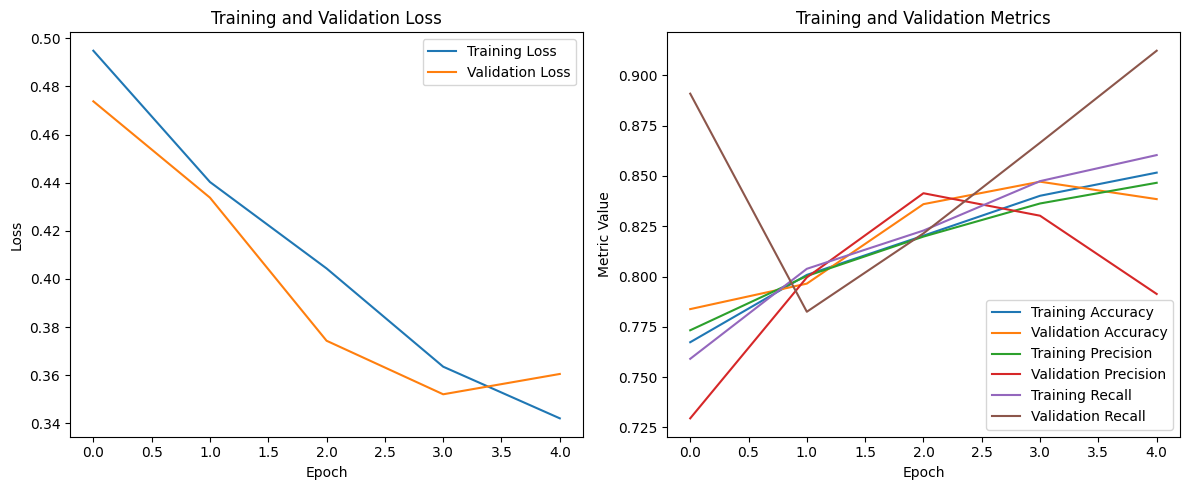

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy, Precision, and Recall including Validation Metrics
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Adding validation accuracy
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')  # Adding validation precision
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')  # Adding validation recall
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [26]:
#drive.flush_and_unmount()

In [27]:
# pickle my best model here...

# Save the model to a file
model_save_path = '/content/drive/My Drive/DeepLearning/my_best_using_30k_images_model.keras'
model.save(model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to /content/drive/My Drive/DeepLearning/my_best_using_30k_images_model.keras
